/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  # This is added back by InteractiveShellApp.init_path()
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmf

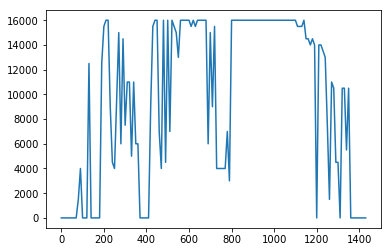

In [3]:
# Load analysis modules 
import numpy as np
import xarray as xr

# Load plotting modules
import matplotlib.pyplot as plt

# Get CPOL metadata for 2003/01/12
CPOL = xr.open_mfdataset('/g/data/rr5/CPOL_radar/CPOL_level_1b/GRIDDED/'
                         + 'GRID_150km_2500m/2003/20030112/'
                         + 'CPOL_20030112_*_GRIDS_2500m.nc')

# Extract just the reflectivity values at x=10000 m, y=10000 m.
ref=CPOL.reflectivity.sel(x=10000).sel(y=10000)

# Alternatively you might like to average horizontally
# ref=CPOL.reflectivity.mean(dim=['x', 'y'], skipna=True)

# Load the data into memory
ref=ref.load()

# Define function for finding z index of highest non-zero ref value
def get_height_top_ind(da):
    inds = np.argwhere(da.values>0)
    if inds.size > 0:
        top_ind = inds[-1,0]
    else:
        top_ind = 0
    return top_ind

# Get the highest non-zero index for each time value
cth = np.zeros(144)
for i in range(len(cth)):
    cth[i] = get_height_top_ind(ref.isel(time=i))

# Multiply by 500 to convert to metres. 
cth *= 500

# Plot cloud top height versus minutes (since 2003/01/12 00:00 UTC)
plt.plot(np.arange(0,24*60,10),cth)